<a href="https://colab.research.google.com/github/jorbler/graph-learning-final-project/blob/main/weighted_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
# Download the actual raw JSON file from GitHub
!wget https://raw.githubusercontent.com/jorbler/graph-learning-final-project/main/congress_network_data/congress_network_data.json -O congress_network_data.json

# Load it safely
import json

with open('congress_network_data.json', 'r') as f:
    data = json.load(f)

# Check what it contains
print(type(data))
print(len(data))
print(data[0].keys())


--2025-05-05 02:05:35--  https://raw.githubusercontent.com/jorbler/graph-learning-final-project/main/congress_network_data/congress_network_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726936 (710K) [text/plain]
Saving to: ‘congress_network_data.json’

congress_network_da 100%[===================>] 709.90K  --.-KB/s    in 0.08s   

2025-05-05 02:05:36 (8.51 MB/s) - ‘congress_network_data.json’ saved [726936/726936]

<class 'list'>
1
dict_keys(['inList', 'inWeight', 'outList', 'outWeight', 'usernameList'])


In [ ]:
data = data[0]

In [ ]:
inList = data["inList"]
inWeight = data["inWeight"]
outList = data["outList"]
outWeight = data["outWeight"]
usernameList = data["usernameList"]

In [ ]:
member_party_mapping = {'SenatorBaldwin':'Democrat', 'SenJohnBarrasso': 'Republican', 'SenatorBennet': 'Democrat', 'MarshaBlackburn': 'Republican',
                        'SenBlumenthal': 'Democrat', 'RoyBlunt': 'Republican', 'CoryBooker': 'Democrat', 'JohnBoozman': 'Republican', 'SenatorBraun': 'Republican',
                        'SenSherrodBrown': 'Democrat', 'SenatorCantwell': 'Democrat','SenCapito': 'Republican','SenatorCardin': 'Democrat','SenatorCarper': 'Democrat',
                        'SenBobCasey': 'Democrat','SenBillCassidy': 'Republican','ChrisCoons': 'Democrat','JohnCornyn': 'Republican','SenCortezMasto': 'Democrat',
                        'SenTomCotton': 'Republican','SenKevinCramer': 'Republican','MikeCrapo': 'Republican','SenTedCruz': 'Republican','SteveDaines': 'Republican',
                        'SenDuckworth': 'Democrat','SenatorDurbin': 'Democrat','SenJoniErnst': 'Republican','SenFeinstein': 'Democrat','SenatorFischer': 'Republican',
                        'SenGillibrand': 'Democrat','LindseyGrahamSC': 'Republican','ChuckGrassley': 'Republican','SenatorHagerty': 'Republican','SenatorHassan': 'Democrat',
                        'HawleyMO': 'Republican','MartinHeinrich': 'Democrat','SenatorHick': 'Democrat','maziehirono': 'Democrat','SenJohnHoeven': 'Republican',
                        'SenHydeSmith': 'Republican','JimInhofe': 'Republican','SenRonJohnson': 'Republican','timkaine': 'Democrat','SenMarkKelly': 'Democrat',
                        'SenJohnKennedy': 'Republican','SenAngusKing': 'Democrat','SenAmyKlobuchar': 'Democrat','SenatorLankford': 'Republican','SenatorLeahy': 'Democrat',
                        'SenMikeLee': 'Republican','SenatorLujan': 'Democrat','SenLummis': 'Republican','Sen_JoeManchin': 'Democrat','SenMarkey': 'Democrat',
                        'SenatorMenendez': 'Democrat','SenJeffMerkley': 'Democrat','JerryMoran': 'Republican','lisamurkowski': 'Republican','ChrisMurphyCT': 'Democrat',
                        'PattyMurray': 'Democrat','ossoff': 'Democrat','SenAlexPadilla': 'Democrat','RandPaul': 'Republican','SenGaryPeters': 'Democrat',
                        'senrobportman': 'Republican','SenJackReed': 'Democrat','SenatorRisch': 'Republican','SenatorRomney': 'Republican','SenJackyRosen': 'Democrat',
                        'marcorubio': 'Republican','SenSanders': 'Democrat','SenSchumer': 'Democrat','SenRickScott': 'Republican','SenatorTimScott': 'Republican',
                        'SenatorShaheen': 'Democrat','SenatorSinema': 'Democrat','SenTinaSmith': 'Democrat','SenStabenow': 'Democrat','SenDanSullivan': 'Republican',
                        'SenatorTester': 'Democrat','SenJohnThune': 'Republican','SenThomTillis': 'Republican','SenToomey': 'Republican','SenTuberville': 'Republican',
                        'ChrisVanHollen': 'Democrat','MarkWarner': 'Democrat','SenatorWarnock': 'Democrat','SenWarren': 'Democrat','SenWhitehouse': 'Democrat',
                        'SenatorWicker': 'Republican','RonWyden': 'Democrat','SenToddYoung': 'Republican','RepAdams': 'Democrat','Robert_Aderholt': 'Republican',
                        'RepPeteAguilar': 'Democrat','RepRickAllen': 'Republican','RepColinAllred': 'Democrat','RepArmstrongND': 'Republican','RepArrington': 'Republican',
                        'RepAuchincloss': 'Democrat','RepCindyAxne': 'Democrat','RepBrianBabin': 'Republican','RepDonBacon': 'Republican','RepJimBaird': 'Republican',
                        'RepBalderson': 'Republican','RepJimBanks': 'Republican','RepAndyBarr': 'Republican','RepBarragan': 'Democrat','RepKarenBass': 'Democrat',
                        'RepBeatty': 'Democrat','RepBera': 'Democrat','RepDonBeyer': 'Democrat','RepBice': 'Republican','RepAndyBiggsAZ': 'Republican',
                        'RepGusBilirakis': 'Republican','SanfordBishop': 'Democrat','RepDanBishop': 'Republican','RepLBR': 'Democrat','RepBoebert': 'Republican',
                        'RepBonamici': 'Democrat','RepBost': 'Republican','RepBourdeaux': 'Democrat','RepBowman': 'Democrat','CongBoyle': 'Democrat',
                        'RepKevinBrady': 'Republican','RepMoBrooks': 'Republican','RepAnthonyBrown': 'Democrat','RepShontelBrown': 'Democrat',
                        'RepBrownley': 'Democrat','VernBuchanan': 'Republican','RepKenBuck': 'Republican','RepLarryBucshon': 'Republican',
                        'RepTedBudd': 'Republican','RepTimBurchett': 'Republican','michaelcburgess': 'Republican','RepCori': 'Democrat','RepCheri': 'Democrat',
                        'RepKatCammack': 'Republican','RepCarbajal': 'Democrat','RepCardenas': 'Democrat','RepMikeCarey': 'Republican','RepJerryCarl': 'Republican',
                        'RepAndreCarson': 'Democrat','RepBuddyCarter': 'Republican','JudgeCarter': 'Republican','RepTroyCarter': 'Democrat',
                        'RepEdCase': 'Democrat','RepCasten': 'Democrat','USRepKCastor': 'Democrat','JoaquinCastrotx': 'Democrat','RepCawthorn': 'Republican',
                        'RepSteveChabot': 'Republican','RepLizCheney': 'Republican','CongresswomanSC': 'Republican','RepJudyChu': 'Democrat',
                        'RepKClark': 'Democrat','RepYvetteClarke': 'Democrat','repcleaver': 'Democrat','RepBenCline': 'Republican','RepCloudTX': 'Republican',
                        'WhipClyburn': 'Democrat','Rep_Clyde': 'Republican','RepCohen': 'Democrat','TomColeOK04': 'Republican','RepJamesComer': 'Republican',
                        'GerryConnolly': 'Democrat','RepLouCorrea': 'Democrat','RepJimCosta': 'Democrat','RepJoeCourtney': 'Democrat','RepAngieCraig': 'Democrat',
                        'RepCharlieCrist': 'Democrat','RepJasonCrow': 'Democrat','RepJohnCurtis': 'Republican','RepDavids': 'Democrat','WarrenDavidson': 'Republican',
                        'RodneyDavis': 'Republican','RepDean': 'Democrat','RepPeterDeFazio': 'Democrat','RepDianaDeGette': 'Democrat','rosadelauro': 'Democrat',
                        'RepDelBene': 'Democrat','repdelgado': 'Democrat','RepValDemings': 'Democrat','RepDeSaulnier': 'Democrat','RepTedDeutch': 'Democrat',
                        'MarioDB': 'Republican','RepDebDingell': 'Democrat','RepLloydDoggett': 'Democrat','RepDonaldsPress': 'Republican',
                        'USRepMikeDoyle': 'Democrat','RepJeffDuncan': 'Republican','DrNealDunnFL2': 'Republican','RepTomEmmer': 'Republican',
                        'RepEscobar': 'Democrat','RepAnnaEshoo': 'Democrat','RepEspaillat': 'Democrat','RepRonEstes': 'Republican','RepDwightEvans': 'Democrat',
                        'RepPatFallon': 'Republican','RepFeenstra': 'Republican','RepDrewFerguson': 'Republican','RepFischbach': 'Republican',
                        'RepBrianFitz': 'Republican','RepChuck': 'Republican','RepFletcher': 'Democrat','RepBillFoster': 'Democrat','virginiafoxx': 'Republican',
                        'RepLoisFrankel': 'Democrat','RepFranklin': 'Democrat','RepRussFulcher': 'Republican','RepMattGaetz': 'Republican',
                        'RepGallagher': 'Republican','RepRubenGallego': 'Democrat','RepGaramendi': 'Democrat','RepGarbarino': 'Republican',
                        'RepChuyGarcia': 'Democrat','RepMikeGarcia': 'Republican','RepSylviaGarcia': 'Democrat','RepBobGibbs': 'Republican',
                        'RepCarlos': 'Republican','replouiegohmert': 'Republican','RepGolden': 'Democrat','RepJimmyGomez': 'Democrat','RepTonyGonzales': 'Republican',
                        'RepJenniffer': 'Republican','RepGonzalez': 'Democrat','RepBobGood': 'Republican','Lancegooden': 'Republican','RepGosar': 'Republican',
                        'RepJoshG': 'Democrat','RepKayGranger': 'Republican','RepGarretGraves': 'Republican','RepAlGreen': 'Democrat','RepMarkGreen': 'Republican',
                        'RepMTG': 'Republican','RepMGriffith': 'Republican','RepRaulGrijalva': 'Democrat','RepGrothman': 'Republican',
                        'RepMichaelGuest': 'Republican','RepGuthrie': 'Republican','RepJoshHarder': 'Democrat','RepHarshbarger': 'Republican',
                        'RepHartzler': 'Republican','RepJahanaHayes': 'Democrat','repkevinhern': 'Republican','RepHerrell': 'Republican',
                        'CongressmanHice': 'Republican','RepBrianHiggins': 'Democrat','RepClayHiggins': 'Republican','RepFrenchHill': 'Republican',
                        'jahimes': 'Democrat','RepAshleyHinson': 'Republican','RepHorsford': 'Democrat','RepHoulahan': 'Democrat','LeaderHoyer': 'Democrat',
                        'RepRichHudson': 'Republican','RepHuffman': 'Democrat','RepHuizenga': 'Republican','repdarrellissa': 'Republican',
                        'JacksonLeeTX18': 'Democrat','RepRonnyJackson': 'Republican','RepJacobs': 'Republican','RepSaraJacobs': 'Democrat',
                        'RepJayapal': 'Democrat','RepJeffries': 'Democrat','RepBillJohnson': 'Republican','RepDustyJohnson': 'Republican',
                        'RepEBJ': 'Democrat','RepHankJohnson': 'Democrat','RepMikeJohnson': 'Republican','RepMondaire': 'Democrat','Jim_Jordan': 'Republican',
                        'RepDaveJoyce': 'Republican','RepJohnJoyce': 'Republican','RepJohnKatko': 'Republican','USRepKeating': 'Democrat',
                        'RepFredKeller': 'Republican','MikeKellyPA': 'Republican','RepRobinKelly': 'Democrat','RepRoKhanna': 'Democrat','RepDanKildee': 'Democrat',
                        'RepDerekKilmer': 'Democrat','RepAndyKimNJ': 'Democrat','RepYoungKim': 'Republican','RepRonKind': 'Democrat',
                        'RepKirkpatrick': 'Democrat','CongressmanRaja': 'Democrat','RepAnnieKuster': 'Democrat','RepDavidKustoff': 'Republican',
                        'RepLaHood': 'Republican','RepLaMalfa': 'Republican','JimLangevin': 'Democrat','RepRickLarsen': 'Democrat','RepJohnLarson': 'Democrat',
                        'boblatta': 'Republican','RepLaTurner': 'Republican','RepLawrence': 'Democrat','RepAlLawsonJr': 'Democrat','RepBarbaraLee': 'Democrat',
                        'RepSusieLee': 'Democrat','RepTeresaLF': 'Democrat','RepDLesko': 'Republican','RepJuliaLetlow': 'Republican','RepAndyLevin': 'Democrat',
                        'RepMikeLevin': 'Democrat','RepTedLieu': 'Democrat','USRepLong': 'Republican','RepLoudermilk': 'Republican','RepLowenthal': 'Democrat',
                        'RepFrankLucas': 'Republican','RepBlaine': 'Republican','RepElaineLuria': 'Democrat','RepNancyMace': 'Republican','RepMalinowski': 'Democrat',
                        'RepMalliotakis': 'Republican','RepMaloney': 'Democrat','RepSeanMaloney': 'Democrat','RepKManning': 'Democrat','RepThomasMassie': 'Republican',
                        'RepBrianMast': 'Republican','DorisMatsui': 'Democrat','RepLucyMcBath': 'Democrat','GOPLeader': 'Republican','RepMcCaul': 'Republican',
                        'RepLisaMcClain': 'Republican','BettyMcCollum04': 'Democrat','RepMcEachin': 'Democrat','RepMcGovern': 'Democrat','PatrickMcHenry': 'Republican',
                        'RepMcKinley': 'Republican','RepGregoryMeeks': 'Democrat','RepMeijer': 'Republican','RepGraceMeng': 'Democrat','RepMeuser': 'Republican',
                        'RepKweisiMfume': 'Democrat','RepMMM': 'Republican','RepCarolMiller': 'Republican','RepMaryMiller': 'Republican','RepAlexMooney': 'Republican',
                        'RepBarryMoore': 'Republican','RepBlakeMoore': 'Republican','RepGwenMoore': 'Democrat','RepJoeMorelle': 'Democrat','RepMullin': 'Democrat',
                        'RepGregMurphy': 'Republican','RepStephMurphy': 'Democrat','RepJerryNadler': 'Democrat','gracenapolitano': 'Democrat',
                        'RepRichardNeal': 'Democrat','RepJoeNeguse': 'Democrat','RepTroyNehls': 'Republican','RepNewhouse': 'Republican','RepMarieNewman': 'Democrat',
                        'DonaldNorcross': 'Democrat','RepRalphNorman': 'Republican','EleanorNorton': 'Democrat','RepOHalleran': 'Democrat','JayObernolte': 'Republican',
                        'Ilhan': 'Democrat','RepBurgessOwens': 'Republican','CongPalazzo': 'Republican','FrankPallone': 'Democrat','USRepGaryPalmer': 'Republican',
                        'RepJimmyPanetta': 'Democrat','RepChrisPappas': 'Democrat','BillPascrell': 'Democrat','RepDonaldPayne': 'Democrat',
                        'SpeakerPelosi': 'Democrat','RepPerlmutter': 'Democrat','RepScottPeters': 'Democrat','RepPfluger': 'Republican',
                        'RepDeanPhillips': 'Democrat','chelliepingree': 'Democrat','StaceyPlaskett': 'Democrat','repmarkpocan': 'Democrat',
                        'RepKatiePorter': 'Democrat','RepPressley': 'Democrat','RepDavidEPrice': 'Democrat','RepMikeQuigley': 'Democrat','RepRaskin': 'Democrat',
                        'GReschenthaler': 'Republican','RepKathleenRice': 'Democrat','RepTomRice': 'Republican','cathymcmorris': 'Republican',
                        'RepMikeRogersAL': 'Republican','RepJohnRose': 'Republican','RepRosendale': 'Republican','RepDeborahRoss': 'Democrat','RepDavidRouzer': 'Republican',
                        'RepChipRoy': 'Republican','RepRoybalAllard': 'Democrat','RepRaulRuizMD': 'Republican','Call_Me_Dutch': 'Democrat','RepBobbyRush': 'Democrat',
                        'RepTimRyan': 'Democrat','Kilili_Sablan': 'Democrat','RepMariaSalazar': 'Republican','RepLindaSanchez': 'Democrat','RepSarbanes': 'Democrat',
                        'SteveScalise': 'Republican','RepMGS': 'Democrat','janschakowsky': 'Democrat','RepAdamSchiff': 'Democrat','RepSchneider': 'Democrat',
                        'RepSchrader': 'Democrat','RepKimSchrier': 'Democrat','RepDavid': 'Republican','AustinScottGA08': 'Republican','BobbyScott': 'Democrat',
                        'PeteSessions': 'Republican','RepTerriSewell': 'Democrat','BradSherman': 'Democrat','RepSherrill': 'Democrat','CongMikeSimpson': 'Republican',
                        'RepSires': 'Democrat','RepSlotkin': 'Democrat','RepAdamSmith': 'Democrat','RepAdrianSmith': 'Republican','RepJasonSmith': 'Republican',
                        'RepSmucker': 'Republican','RepDarrenSoto': 'Democrat','RepSpanberger': 'Democrat','RepSpartz': 'Republican','RepSpeier': 'Democrat',
                        'Rep_Stansbury': 'Democrat','RepGregStanton': 'Democrat','RepPeteStauber': 'Republican','RepSteel': 'Republican','RepStefanik': 'Republican',
                        'RepBryanSteil': 'Republican','RepGregSteube': 'Republican','RepHaleyStevens': 'Democrat','RepChrisStewart': 'Republican',
                        'RepStricklandWA': 'Democrat','RepTomSuozzi': 'Democrat','RepSwalwell': 'Democrat','RepMarkTakano': 'Democrat','claudiatenney': 'Republican',
                        'BennieGThompson': 'Democrat','RepThompson': 'Democrat','RepTiffany': 'Republican','RepTimmons': 'Republican','repdinatitus': 'Democrat',
                        'RepRashida': 'Democrat','RepPaulTonko': 'Democrat','NormaJTorres': 'Democrat','RepRitchie': 'Democrat','RepLoriTrahan': 'Democrat',
                        'RepDavidTrone': 'Democrat','RepMikeTurner': 'Republican','RepUnderwood': 'Democrat','RepDavidValadao': 'Republican',
                        'RepBethVanDuyne': 'Republican','RepJuanVargas': 'Democrat','RepVeasey': 'Democrat','NydiaVelazquez': 'Democrat',
                        'RepAnnWagner': 'Republican','RepWalberg': 'Republican','RepWalorski': 'Republican','michaelgwaltz': 'Republican',
                        'RepDWStweets': 'Democrat','RepBonnie': 'Democrat','RepWebster': 'Republican','PeterWelch': 'Democrat','RepWesterman': 'Republican',
                        'RepWexton': 'Democrat','RepSusanWild': 'Democrat','RepNikema': 'Democrat','RepRWilliams': 'Republican','RepWilson': 'Democrat',
                        'RepJoeWilson': 'Republican','RobWittman': 'Republican','rep_stevewomack': 'Republican','RepJohnYarmuth': 'Democrat',
                        'RepLeeZeldin': 'Republican'}

In [ ]:
set(list(member_party_mapping.values()))

{'Democrat', 'Republican'}

In [ ]:
party_color_mapping = {'Democrat': 'blue',
                       'Republican': 'red'}

In [ ]:
import networkx as nx

G = nx.DiGraph()

for user in usernameList:
  party = member_party_mapping.get(user)
  G.add_node(user, party=party)

In [ ]:
for i, targets in enumerate(outList):
    user = usernameList[i]
    for target_idx in targets:
        target = usernameList[target_idx]
        if user in G.nodes and target in G.nodes:
            G.add_edge(user, target)

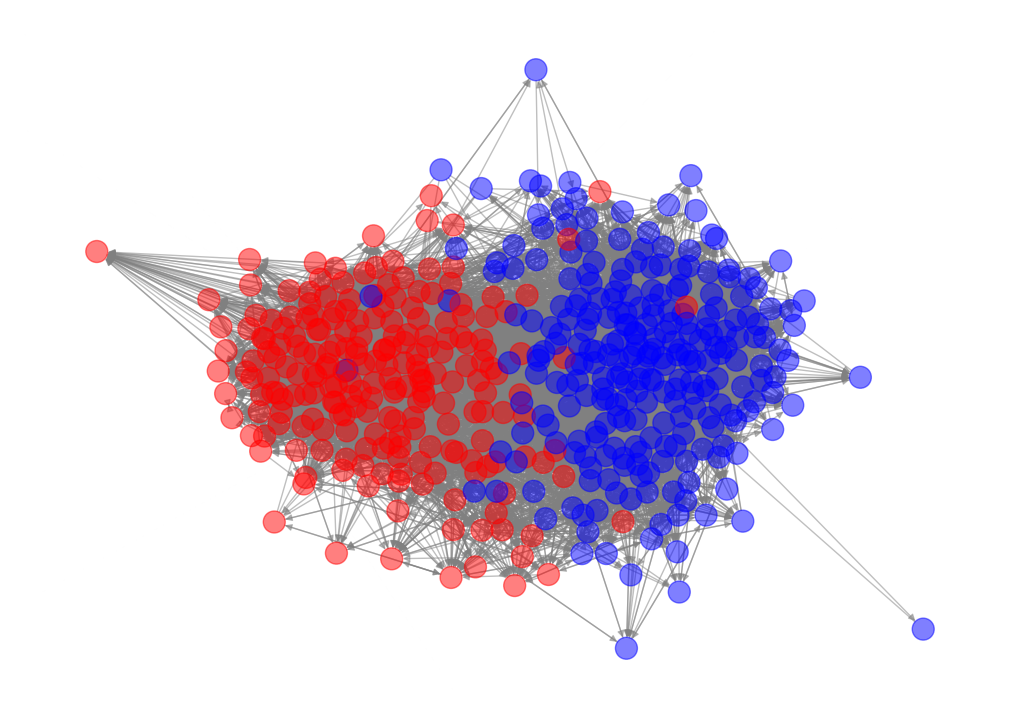

In [ ]:
node_colors = [party_color_mapping[member_party_mapping[node]] for node in G.nodes]

plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=False, node_color=node_colors, edge_color="gray", node_size=250, alpha=0.5)
plt.show()

In [ ]:
plt.savefig('congress_network.jpg')

<Figure size 640x480 with 0 Axes>

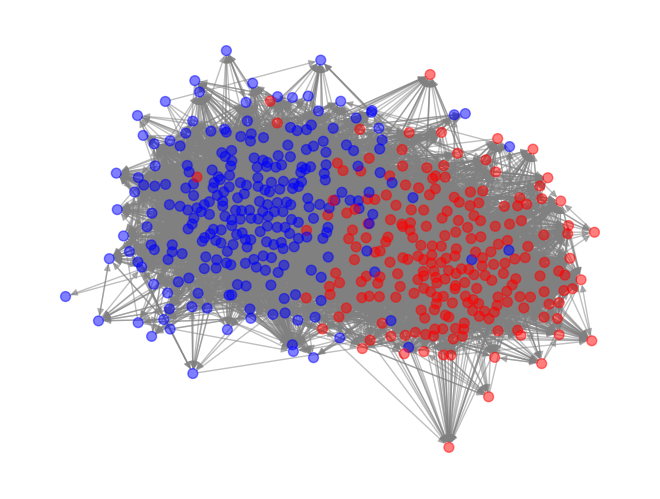

In [ ]:
pos = nx.spring_layout(G, k=0.5)  # Adjust `k` for spacing
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color="gray", alpha=0.5, node_size=50)

In [ ]:
G.number_of_nodes()

475

In [ ]:
G.number_of_edges()

13289

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
nx.set_node_attributes(G, degree_centrality, name="degree_centrality")
nx.set_node_attributes(G, betweenness_centrality, name="betweenness_centrality")
nx.set_node_attributes(G, closeness_centrality, name="closeness_centrality")

In [ ]:
class_labels = []
for node in G.nodes():
  party = G.nodes[node]['party']
  if party == 'Democrat':
    class_labels.append(0)
  else:
    class_labels.append(1)

In [ ]:
#class_labels

In [ ]:
edge_list = list(G.edges())

In [ ]:
node_mapping = {node: idx for idx, node in enumerate(G.nodes())}

In [ ]:
numerical_edge_list = [[node_mapping[source], node_mapping[target]] for source, target in edge_list]

In [ ]:
#numerical_edge_list

# Data Formatting

In [ ]:
import torch

In [ ]:
features = []

for node in G.nodes():
  features.append([
  G.nodes[node]['degree_centrality'],
  G.nodes[node]['betweenness_centrality'],
  G.nodes[node]['closeness_centrality']
  ])

x = torch.tensor(features, dtype=torch.float)

In [ ]:
y = torch.tensor(class_labels, dtype=torch.long)

In [ ]:
edge_index = torch.tensor(numerical_edge_list, dtype=torch.long).t().contiguous()

In [ ]:
!pip install torch-geometric
from torch_geometric.data import Data

data = Data(x=x, y=y, edge_index=edge_index)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00


In [ ]:
# Define custom split ratios
train_ratio = 0.6  # 60% for training
val_ratio = 0.2    # 20% for validation
test_ratio = 1.0 - train_ratio - val_ratio  # Remaining 20% for testing

num_nodes = G.number_of_nodes()

random_indices = torch.randperm(num_nodes)

# Split indices based on defined ratios
train_idx = random_indices[:int(train_ratio * num_nodes)]
val_idx = random_indices[int(train_ratio * num_nodes):int((train_ratio + val_ratio) * num_nodes)]
test_idx = random_indices[int((train_ratio + val_ratio) * num_nodes):]

# Create new masks for the custom split
# create all zero vectors corresponding to the size of the graphs- in this case, they are all of length 2708
data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign nodes to the corresponding masks
data.train_mask[train_idx] = True
data.val_mask[val_idx] = True
data.test_mask[test_idx] = True

# Display the new data split
print("\nCustom Data Split:")
print(f"Training Nodes: {data.train_mask.sum().item()} ({train_ratio * 100:.1f}%)")
print(f"Validation Nodes: {data.val_mask.sum().item()} ({val_ratio * 100:.1f}%)")
print(f"Test Nodes: {data.test_mask.sum().item()} ({test_ratio * 100:.1f}%)")


Custom Data Split:
Training Nodes: 285 (60.0%)
Validation Nodes: 95 (20.0%)
Test Nodes: 95 (20.0%)


# Model

In [ ]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class OriginalGCN(torch.nn.Module): # local neighbor aggregation for every node
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(OriginalGCN, self).__init__()
        # Using GCNConv without normalization
        self.conv1 = GCNConv(in_channels, hidden_channels, normalize=False)
        self.conv2 = GCNConv(hidden_channels, out_channels, normalize=False)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


class NormalizedGCN(torch.nn.Module): # penalizes impact of nodes with large degrees
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(NormalizedGCN, self).__init__()
        # Using GCNConv with Laplacian normalization
        self.conv1 = GCNConv(in_channels, hidden_channels, normalize=True)
        self.conv2 = GCNConv(hidden_channels, out_channels, normalize=True)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
in_channels = data.x.shape[1]
hidden_channels = 16
out_channels = 2

orggcn = OriginalGCN(in_channels, hidden_channels, out_channels)
print(orggcn)
normgcn = NormalizedGCN(in_channels, hidden_channels, out_channels)
print(normgcn)

OriginalGCN(
  (conv1): GCNConv(3, 16)
  (conv2): GCNConv(16, 2)
)
NormalizedGCN(
  (conv1): GCNConv(3, 16)
  (conv2): GCNConv(16, 2)
)


In [ ]:
# Define optimizers
optimizer_original = torch.optim.Adam(orggcn.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_normalized = torch.optim.Adam(normgcn.parameters(), lr=0.01, weight_decay=5e-4)
epochs = 100

def train(model, optimizer):
    model.train()
    optimizer.zero_grad() # set gradient to be zero at beginning
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask]) # only looking at the 60% of indices chosen for training
    loss.backward()
    optimizer.step() # calculate how large we apply the gradient to find the model parameters
    return loss.item()

def validate(model):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        val_loss = F.nll_loss(out[data.val_mask], data.y[data.val_mask]).item()
        pred = out.argmax(dim=1)
        correct = (pred[data.val_mask] == data.y[data.val_mask]).sum().item()
        val_acc = correct / data.val_mask.sum().item()
    return val_loss, val_acc

# Store losses for visualization
train_losses_original = []
train_losses_normalized = []

# Training loop
for epoch in range(epochs):
    # Train original model
    train_loss_original = train(orggcn, optimizer_original)
    train_losses_original.append(train_loss_original)

    # Train normalized model
    train_loss_normalized = train(normgcn, optimizer_normalized)
    train_losses_normalized.append(train_loss_normalized)

    # Validation every 20 epochs
    if epoch % 20 == 0:
        val_loss_original, val_acc_original = validate(orggcn)
        val_loss_normalized, val_acc_normalized = validate(normgcn)

        print(f'Original GCN - Val Loss: {val_loss_original:.4f}, Val Acc: {val_acc_original:.4f}')
        print(f'Normalized GCN - Val Loss: {val_loss_normalized:.4f}, Val Acc: {val_acc_normalized:.4f}')

Original GCN - Val Loss: 87.8747, Val Acc: 0.4211
Normalized GCN - Val Loss: 0.6986, Val Acc: 0.4211
Original GCN - Val Loss: 8.3085, Val Acc: 0.5895
Normalized GCN - Val Loss: 0.6818, Val Acc: 0.5789
Original GCN - Val Loss: 4.0292, Val Acc: 0.4211
Normalized GCN - Val Loss: 0.6810, Val Acc: 0.6105
Original GCN - Val Loss: 1.7672, Val Acc: 0.5895
Normalized GCN - Val Loss: 0.6770, Val Acc: 0.6421
Original GCN - Val Loss: 1.3049, Val Acc: 0.4316
Normalized GCN - Val Loss: 0.6749, Val Acc: 0.6632


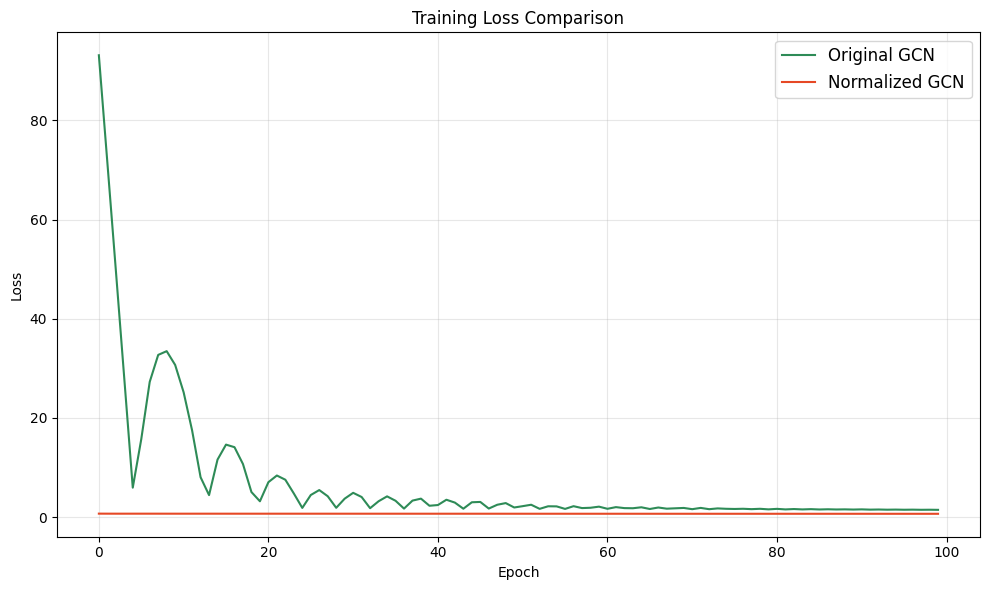

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot both loss curves
plt.plot(train_losses_original, label='Original GCN', color='#2E8B57')
plt.plot(train_losses_normalized, label='Normalized GCN', color='#E64825')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def test(model, name=""):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        out = model(data.x, data.edge_index)  # Forward pass
        pred = out.argmax(dim=1)  # Get predicted class labels
        # Get probability scores for AUC calculation
        probas = torch.softmax(out, dim=1)

        # Extract test set data
        y_true = data.y[data.test_mask].cpu()  # Ground truth labels for test set
        y_pred = pred[data.test_mask].cpu()  # Model predictions for test set
        y_probas = probas[data.test_mask].cpu()  # Probability scores for test set

        # 1. Accuracy (Overall classification accuracy)
        # Simple metric: number of correct predictions / total number of predictions
        test_acc = accuracy_score(y_true, y_pred)

        # 2. Macro averaging - Compute metrics for each label independently and then take the average
        # Treats all classes equally, regardless of their support (class imbalance)
        # Example: For binary case where class 1 has F1=0.9 (1000 samples) and class 2 has F1=0.7 (10 samples)
        # Macro-F1 = (0.9 + 0.7)/2 = 0.8
        test_macro_f1 = f1_score(y_true, y_pred, average='macro')
        test_macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        test_macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)

        # 3. Micro averaging - Aggregate TP, FP, TN, FN for all classes and then compute metrics
        # Better for imbalanced datasets as it gives more weight to classes with more samples
        # For the above example, Micro-F1 would be closer to 0.9 since class 1 has more samples
        test_micro_f1 = f1_score(y_true, y_pred, average='micro')

        # 4. Weighted averaging - Similar to macro, but weighted by the number of samples per class
        # Accounts for class imbalance while still computing per-class metrics
        # For above example: Weighted-F1 = (0.9*1000 + 0.7*10)/(1000 + 10) ≈ 0.898
        test_weighted_f1 = f1_score(y_true, y_pred, average='weighted')

        # 5. ROC AUC Scores using different averaging methods
        try:
            # Macro ROC AUC - Simple average of per-class ROC AUC
            # Treats all classes equally regardless of class imbalance
            test_macro_auc = roc_auc_score(y_true, y_probas, average='macro', multi_class='ovr')

            # Weighted ROC AUC - Average of per-class ROC AUC weighted by class frequency
            # Accounts for class imbalance by giving more weight to larger classes
            test_weighted_auc = roc_auc_score(y_true, y_probas, average='weighted', multi_class='ovr')
        except ValueError:
            # Handle special cases (e.g., missing classes)
            test_macro_auc = float('nan')
            test_weighted_auc = float('nan')

        # Print results with clear labels
        print(f"\nTest Set Performance for {name}:")
        print(f"Accuracy          : {test_acc:.4f}")
        print(f"Macro-F1         : {test_macro_f1:.4f}")
        print(f"Macro-Precision  : {test_macro_precision:.4f}")
        print(f"Macro-Recall     : {test_macro_recall:.4f}")
        print(f"Micro-F1         : {test_micro_f1:.4f}")
        print(f"Weighted-F1      : {test_weighted_f1:.4f}")
        print(f"Macro-AUC        : {test_macro_auc:.4f}")
        print(f"Weighted-AUC     : {test_weighted_auc:.4f}")

# Run the test function for both models
test(orggcn, "Original GCN")
test(normgcn, "Normalized GCN")


Test Set Performance for Original GCN:
Accuracy          : 0.3684
Macro-F1         : 0.3214
Macro-Precision  : 0.3154
Macro-Recall     : 0.3605
Micro-F1         : 0.3684
Weighted-F1      : 0.3271
Macro-AUC        : nan
Weighted-AUC     : nan

Test Set Performance for Normalized GCN:
Accuracy          : 0.5263
Macro-F1         : 0.4813
Macro-Precision  : 0.5254
Macro-Recall     : 0.5175
Micro-F1         : 0.5263
Weighted-F1      : 0.4861
Macro-AUC        : nan
Weighted-AUC     : nan


**Model with Edge Weights Incorporated**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# prep edge weights
edge_weights = []
for i, targets in enumerate(outList):
    for j, target_idx in enumerate(targets):
        weight = outWeight[i][j]
        edge_weights.append(weight)

In [ ]:
# raw edge weights (NOT normalized)
raw_edge_weight = torch.tensor(edge_weights, dtype=torch.float)

# normalized edge weights
scaler = MinMaxScaler()
edge_weights_array = np.array(edge_weights).reshape(-1, 1)
normalized_weights = scaler.fit_transform(edge_weights_array)
norm_edge_weight = torch.tensor(normalized_weights.flatten(), dtype=torch.float)

In [ ]:
# og weighted model, NOT normalized
class OriginalWeightedGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(OriginalWeightedGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, normalize=False)
        self.conv2 = GCNConv(hidden_channels, out_channels, normalize=False)

    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        return F.log_softmax(x, dim=1)

In [ ]:
# normalized weighted model
class NormalizedWeightedGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(NormalizedWeightedGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, normalize=True)
        self.conv2 = GCNConv(hidden_channels, out_channels, normalize=True)

    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        return F.log_softmax(x, dim=1)

In [ ]:
# training func
def train(model, optimizer, edge_weight):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, edge_weight)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

In [ ]:
# validation func
def validate(model, edge_weight):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, edge_weight)
        val_loss = F.nll_loss(out[data.val_mask], data.y[data.val_mask]).item()
        pred = out.argmax(dim=1)
        correct = (pred[data.val_mask] == data.y[data.val_mask]).sum().item()
        val_acc = correct / data.val_mask.sum().item()
    return val_loss, val_acc

In [ ]:
# test func
def test(model, name, edge_weight):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, edge_weight)
        pred = out.argmax(dim=1)
        probas = torch.softmax(out, dim=1)

        y_true = data.y[data.test_mask].cpu()
        y_pred = pred[data.test_mask].cpu()
        y_probas = probas[data.test_mask].cpu()

        from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

        test_acc = accuracy_score(y_true, y_pred)
        test_macro_f1 = f1_score(y_true, y_pred, average='macro')
        test_macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        test_macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        test_micro_f1 = f1_score(y_true, y_pred, average='micro')
        test_weighted_f1 = f1_score(y_true, y_pred, average='weighted')

        try:
            test_macro_auc = roc_auc_score(y_true, y_probas, average='macro', multi_class='ovr')
            test_weighted_auc = roc_auc_score(y_true, y_probas, average='weighted', multi_class='ovr')
        except ValueError:
            test_macro_auc = float('nan')
            test_weighted_auc = float('nan')

        print(f"\nTest Set Performance for {name}:")
        print(f"Accuracy          : {test_acc:.4f}")
        print(f"Macro-F1          : {test_macro_f1:.4f}")
        print(f"Macro-Precision   : {test_macro_precision:.4f}")
        print(f"Macro-Recall      : {test_macro_recall:.4f}")
        print(f"Micro-F1          : {test_micro_f1:.4f}")
        print(f"Weighted-F1       : {test_weighted_f1:.4f}")
        print(f"Macro-AUC         : {test_macro_auc:.4f}")
        print(f"Weighted-AUC      : {test_weighted_auc:.4f}")

In [ ]:
# instantiate/train both
og_model = OriginalWeightedGCN(in_channels, hidden_channels, out_channels)
norm_model = NormalizedWeightedGCN(in_channels, hidden_channels, out_channels)

optimizer_og = torch.optim.Adam(og_model.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_norm = torch.optim.Adam(norm_model.parameters(), lr=0.01, weight_decay=5e-4)

In [ ]:
for epoch in range(epochs):
    train(og_model, optimizer_og, raw_edge_weight)
    train(norm_model, optimizer_norm, norm_edge_weight)

In [ ]:
# test
test(og_model, "Original Weighted GCN", raw_edge_weight)
test(norm_model, "Normalized Weighted GCN", norm_edge_weight)


Test Set Performance for Original Weighted GCN:
Accuracy          : 0.6105
Macro-F1          : 0.5790
Macro-Precision   : 0.6395
Macro-Recall      : 0.6025
Micro-F1          : 0.6105
Weighted-F1       : 0.5826
Macro-AUC         : nan
Weighted-AUC      : nan

Test Set Performance for Normalized Weighted GCN:
Accuracy          : 0.5053
Macro-F1          : 0.3537
Macro-Precision   : 0.4221
Macro-Recall      : 0.4905
Micro-F1          : 0.5053
Weighted-F1       : 0.3636
Macro-AUC         : nan
Weighted-AUC      : nan


**GATConv**

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from itertools import product
import random

In [ ]:
# gat model
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads = 1, dropout = 0.6):
        super(GAT, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads = heads, dropout = dropout)
        self.gat2 = GATConv(hidden_channels*heads, out_channels, heads = 1, concat = False, dropout = dropout)

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        return F.log_softmax(x, dim = 1)

In [ ]:
# class weights
classes = np.array([0, 1])
class_weights = compute_class_weight('balanced', classes = classes, y = data.y[data.train_mask].cpu().numpy())
class_weights = torch.tensor(class_weights, dtype = torch.float).to(data.x.device)

# training
def train(model, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask], weight = class_weights)
    loss.backward()
    optimizer.step()
    return loss.item()

# validation
def validate(model):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        val_loss = F.nll_loss(out[data.val_mask], data.y[data.val_mask], weight = class_weights).item()
        pred = out.argmax(dim = 1)
        correct = (pred[data.val_mask] == data.y[data.val_mask]).sum().item()
        val_acc = correct/data.val_mask.sum().item()
    return val_loss, val_acc

In [ ]:
# test
def test(model, name):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim = 1)
        probas = torch.softmax(out, dim = 1)

        y_true = data.y[data.test_mask].cpu()
        y_pred = pred[data.test_mask].cpu()
        y_probas = probas[data.test_mask].cpu()

        test_acc = accuracy_score(y_true, y_pred)
        test_macro_f1 = f1_score(y_true, y_pred, average = 'macro')
        test_macro_precision = precision_score(y_true, y_pred, average = 'macro', zero_division = 0)
        test_macro_recall = recall_score(y_true, y_pred, average = 'macro', zero_division = 0)
        test_micro_f1 = f1_score(y_true, y_pred, average = 'micro')
        test_weighted_f1 = f1_score(y_true, y_pred, average = 'weighted')

        print(f"\nTest Set Performance for {name}:")
        print(f"Accuracy          : {test_acc:.4f}")
        print(f"Macro-F1          : {test_macro_f1:.4f}")
        print(f"Macro-Precision   : {test_macro_precision:.4f}")
        print(f"Macro-Recall      : {test_macro_recall:.4f}")
        print(f"Micro-F1          : {test_micro_f1:.4f}")
        print(f"Weighted-F1       : {test_weighted_f1:.4f}")

In [ ]:
# hyperparameter tuning
param_grid = {'hidden': [8, 16, 32],
              'heads': [1, 2, 4],
              'dropout': [0.0, 0.3, 0.6],
              'lr': [0.01, 0.005]}

combinations = list(product(*param_grid.values()))

best_val_acc = 0
best_model = None
best_params = {}
patience = 20

for idx, (hidden, heads, dropout, lr) in enumerate(combinations):
    print(f"Trial {idx+1}: hidden = {hidden}, heads = {heads}, dropout = {dropout}, lr = {lr}")

    model = GAT(data.num_node_features, hidden, 2, heads = heads, dropout = dropout).to(data.x.device)
    optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = 5e-4)

    patience_counter = 0
    best_epoch_val_acc = 0

    for epoch in range(300):
        train(model, optimizer)
        val_loss, val_acc = validate(model)

        if val_acc > best_epoch_val_acc:
            best_epoch_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Stop early at epoch {epoch}")
            break

    print(f"Final Validation Accuracy: {best_epoch_val_acc:.4f}\n")

    if best_epoch_val_acc > best_val_acc:
        best_val_acc = best_epoch_val_acc
        best_model = model
        best_params = {'hidden': hidden,
                       'heads': heads,
                       'dropout': dropout,
                       'lr': lr}

print("Best GAT Accuracy:", best_val_acc)
print("Best Params:", best_params)
test(best_model, "Best GAT")

Trial 1: hidden = 8, heads = 1, dropout = 0.0, lr = 0.01
Stop early at epoch 24
Final Validation Accuracy: 0.6000

Trial 2: hidden = 8, heads = 1, dropout = 0.0, lr = 0.005
Stop early at epoch 35
Final Validation Accuracy: 0.6421

Trial 3: hidden = 8, heads = 1, dropout = 0.3, lr = 0.01
Stop early at epoch 20
Final Validation Accuracy: 0.5789

Trial 4: hidden = 8, heads = 1, dropout = 0.3, lr = 0.005
Stop early at epoch 29
Final Validation Accuracy: 0.5895

Trial 5: hidden = 8, heads = 1, dropout = 0.6, lr = 0.01
Stop early at epoch 31
Final Validation Accuracy: 0.6211

Trial 6: hidden = 8, heads = 1, dropout = 0.6, lr = 0.005
Stop early at epoch 23
Final Validation Accuracy: 0.5895

Trial 7: hidden = 8, heads = 2, dropout = 0.0, lr = 0.01
Stop early at epoch 20
Final Validation Accuracy: 0.5789

Trial 8: hidden = 8, heads = 2, dropout = 0.0, lr = 0.005
Stop early at epoch 20
Final Validation Accuracy: 0.5789

Trial 9: hidden = 8, heads = 2, dropout = 0.3, lr = 0.01
Stop early at epoch

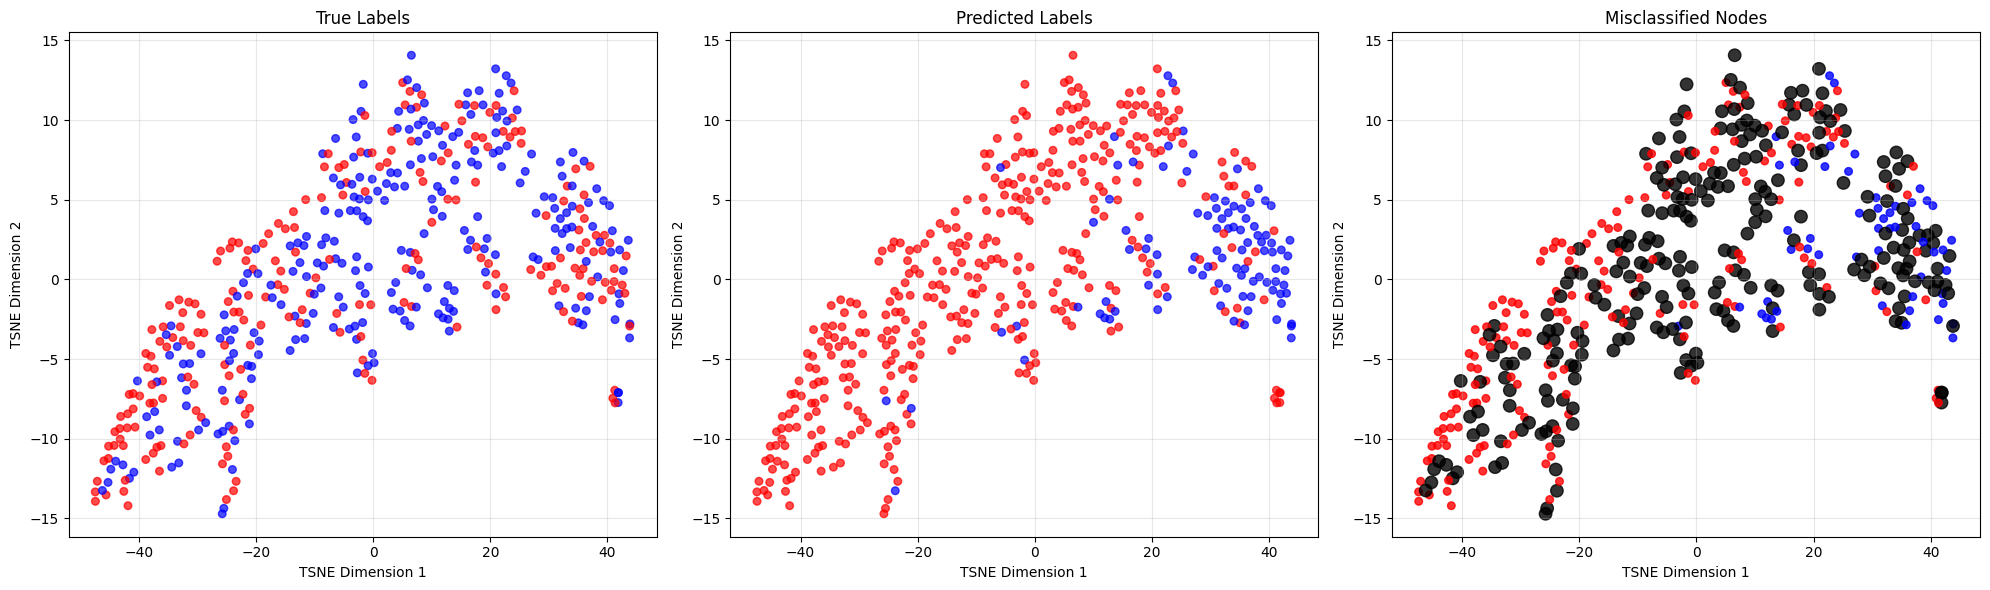

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# node embeddings and predictions
best_model.eval()
with torch.no_grad():
    embeddings = best_model.gat1(data.x, data.edge_index)
    out = best_model(data.x, data.edge_index)
    pred = out.argmax(dim = 1)

embeddings = embeddings.cpu().numpy()
pred = pred.cpu().numpy()
true = data.y.cpu().numpy()

# tsne
tsne = TSNE(n_components = 2, random_state = 42)
embeddings_2d = tsne.fit_transform(embeddings)

color_map = {0: 'blue', 1: 'red'}
true_colors = [color_map[label] for label in true]
pred_colors = [color_map[label] for label in pred]

# misclassified nodes
misclassified = (pred != true)
misclassified_sizes = [80 if wrong else 30 for wrong in misclassified]
misclassified_colors = ['black' if wrong else color_map[label] for wrong, label in zip(misclassified, true)]

# Plot
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = true_colors, s = 30, alpha = 0.7)
axs[0].set_title("True Labels")
axs[0].grid(True, alpha = 0.3)

axs[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = pred_colors, s = 30, alpha = 0.7)
axs[1].set_title("Predicted Labels")
axs[1].grid(True, alpha = 0.3)

axs[2].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = misclassified_colors, s = misclassified_sizes, alpha = 0.8)
axs[2].set_title("Misclassified Nodes")
axs[2].grid(True, alpha = 0.3)

for ax in axs:
    ax.set_xlabel("TSNE Dimension 1")
    ax.set_ylabel("TSNE Dimension 2")

plt.tight_layout()
plt.show()

additional structural features

In [ ]:
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install networkx

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 50.6 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import torch
from torch_geometric.utils import to_networkx
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# networkx
G_nx = to_networkx(data, to_undirected = True)

In [ ]:
# structural features
degree_dict = dict(nx.degree(G_nx))
betweenness_dict = nx.betweenness_centrality(G_nx)
closeness_dict = nx.closeness_centrality(G_nx)
pagerank_dict = nx.pagerank(G_nx)

num_nodes = data.num_nodes
features = np.zeros((num_nodes, 4))
for node in range(num_nodes):
    features[node] = [degree_dict[node],
                      betweenness_dict[node],
                      closeness_dict[node],
                      pagerank_dict[node]]

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
structural_features = torch.tensor(features, dtype=torch.float, device=data.x.device)
data.x = torch.cat([data.x, structural_features], dim=1)

In [ ]:
in_channels = data.x.shape[1]  # new input size with structural features
model = GAT(in_channels = in_channels, hidden_channels = 8, out_channels = 2, heads = 4).to(data.x.device)

In [ ]:
test(model, "additional features")


Test Set Performance for additional features:
Accuracy          : 0.6316
Macro-F1          : 0.5844
Macro-Precision   : 0.7066
Macro-Recall      : 0.6216
Micro-F1          : 0.6316
Weighted-F1       : 0.5888


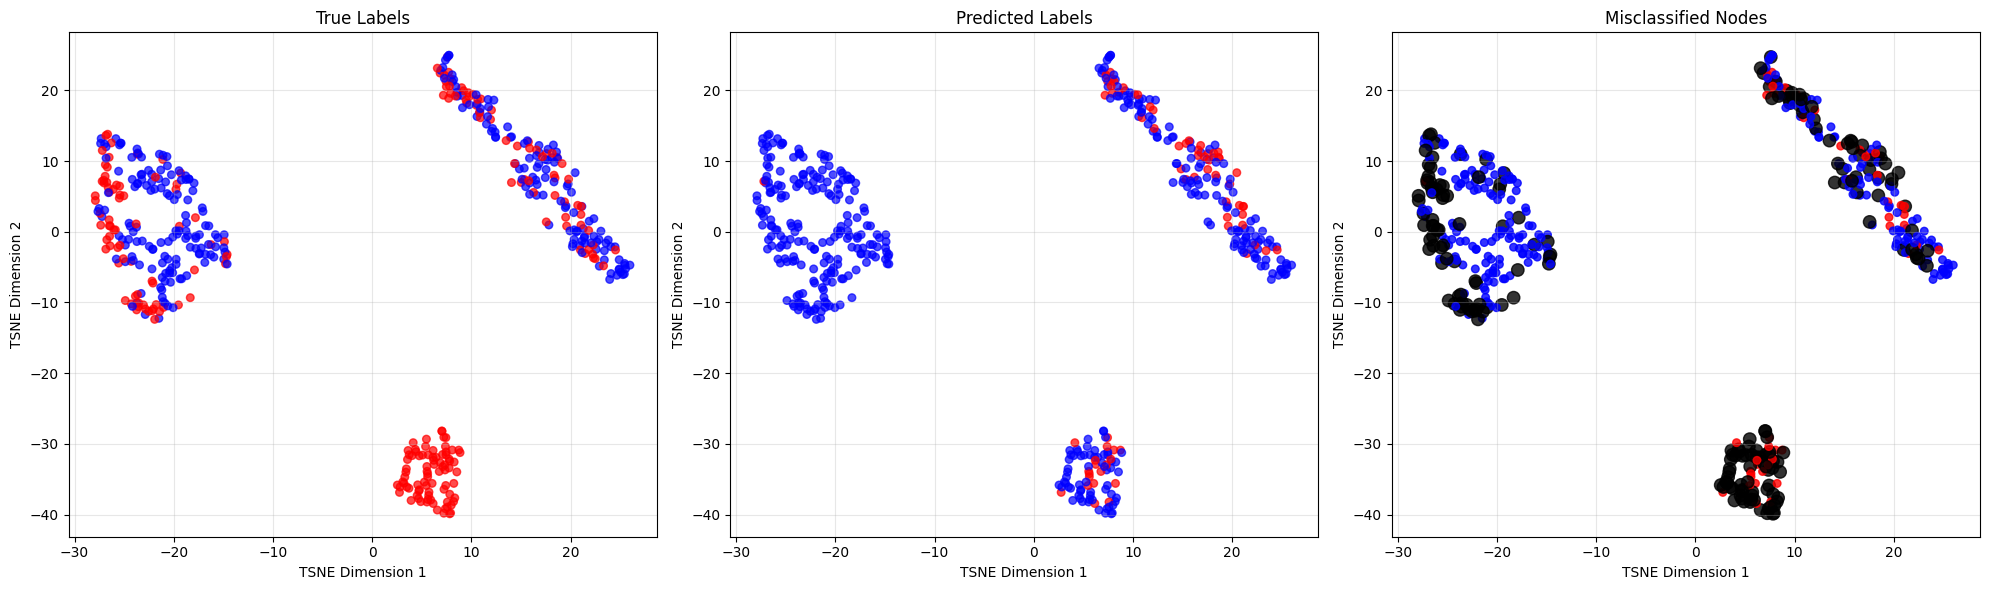

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# node embeddings and predictions
model.eval()
with torch.no_grad():
    embeddings = model.gat1(data.x, data.edge_index)
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim = 1)

embeddings = embeddings.cpu().numpy()
pred = pred.cpu().numpy()
true = data.y.cpu().numpy()

# tsne
tsne = TSNE(n_components = 2, random_state = 42)
embeddings_2d = tsne.fit_transform(embeddings)

color_map = {0: 'blue', 1: 'red'}
true_colors = [color_map[label] for label in true]
pred_colors = [color_map[label] for label in pred]

# misclassified nodes
misclassified = (pred != true)
misclassified_sizes = [80 if wrong else 30 for wrong in misclassified]
misclassified_colors = ['black' if wrong else color_map[label] for wrong, label in zip(misclassified, true)]

# Plot
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = true_colors, s = 30, alpha = 0.7)
axs[0].set_title("True Labels")
axs[0].grid(True, alpha = 0.3)

axs[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = pred_colors, s = 30, alpha = 0.7)
axs[1].set_title("Predicted Labels")
axs[1].grid(True, alpha = 0.3)

axs[2].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = misclassified_colors, s = misclassified_sizes, alpha = 0.8)
axs[2].set_title("Misclassified Nodes")
axs[2].grid(True, alpha = 0.3)

for ax in axs:
    ax.set_xlabel("TSNE Dimension 1")
    ax.set_ylabel("TSNE Dimension 2")

plt.tight_layout()
plt.show()

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads = 1):
        super(GAT, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads = heads, dropout = 0.6)
        self.gat2 = GATConv(hidden_channels * heads, out_channels, heads = 1, concat = False, dropout = 0.6)

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        return F.log_softmax(x, dim = 1)

In [ ]:
# class weights
classes = np.unique(data.y.cpu().numpy())
class_weights = compute_class_weight('balanced', classes = classes, y = data.y[data.train_mask].cpu().numpy())
class_weights = torch.tensor(class_weights, dtype = torch.float).to(data.x.device)

# train
def train(model, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask], weight = class_weights)
    loss.backward()
    optimizer.step()
    return loss.item()

# validate
def validate(model):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        val_loss = F.nll_loss(out[data.val_mask], data.y[data.val_mask], weight = class_weights).item()
        pred = out.argmax(dim = 1)
        correct = (pred[data.val_mask] == data.y[data.val_mask]).sum().item()
        val_acc = correct/data.val_mask.sum().item()
    return val_loss, val_acc

In [ ]:
# test
def test(model):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim = 1)

        y_true = data.y[data.test_mask].cpu()
        y_pred = pred[data.test_mask].cpu()

        acc = accuracy_score(y_true, y_pred)
        macro_f1 = f1_score(y_true, y_pred, average = 'macro')
        precision = precision_score(y_true, y_pred, average = 'macro', zero_division = 0)
        recall = recall_score(y_true, y_pred, average = 'macro', zero_division = 0)

        return {'Accuracy': acc,
                'F1': macro_f1,
                'Precision': precision,
                'Recall': recall}

In [ ]:
# hyperparameter tuning
param_grid = {'hidden': [8, 16],
              'heads': [2, 4],
              'lr': [0.01, 0.005]}

import itertools
combinations = list(itertools.product(*param_grid.values()))

best_acc = 0
best_model = None
best_params = {}
best_metrics = None

for i, (hidden, heads, lr) in enumerate(combinations):
    print(f"Trial {i+1}: hidden = {hidden}, heads = {heads}, lr = {lr}")

    model = GAT(data.num_node_features, hidden, 2, heads = heads).to(data.x.device)
    optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = 5e-4)

    best_val_acc = 0
    patience_counter = 0
    patience = 30
    epochs = 300

    for epoch in range(epochs):
        train(model, optimizer)
        val_loss, val_acc = validate(model)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            break

    model.load_state_dict(best_state)
    metrics = test(model)

    print(f"Validation Accuracy: {best_val_acc:.4f}, Test Accuracy: {metrics['Accuracy']:.4f}")

    if metrics['Accuracy'] > best_acc:
        best_acc = metrics['Accuracy']
        best_model = model
        best_params = {'hidden': hidden, 'heads': heads, 'lr': lr}
        best_metrics = metrics

print("\nBest GAT Test Accuracy:", best_acc)
print("Best Params:", best_params)
print("Metrics:", best_metrics)

Trial 1: hidden = 8, heads = 2, lr = 0.01
Validation Accuracy: 0.6000, Test Accuracy: 0.4947
Trial 2: hidden = 8, heads = 2, lr = 0.005
Validation Accuracy: 0.8632, Test Accuracy: 0.8316
Trial 3: hidden = 8, heads = 4, lr = 0.01
Validation Accuracy: 0.8737, Test Accuracy: 0.9474
Trial 4: hidden = 8, heads = 4, lr = 0.005
Validation Accuracy: 0.8842, Test Accuracy: 0.9158
Trial 5: hidden = 16, heads = 2, lr = 0.01
Validation Accuracy: 0.8316, Test Accuracy: 0.8211
Trial 6: hidden = 16, heads = 2, lr = 0.005
Validation Accuracy: 0.8316, Test Accuracy: 0.8105
Trial 7: hidden = 16, heads = 4, lr = 0.01
Validation Accuracy: 0.6421, Test Accuracy: 0.4842
Trial 8: hidden = 16, heads = 4, lr = 0.005
Validation Accuracy: 0.8526, Test Accuracy: 0.7684

Best GAT Test Accuracy: 0.9473684210526315
Best Params: {'hidden': 8, 'heads': 4, 'lr': 0.01}
Metrics: {'Accuracy': 0.9473684210526315, 'F1': 0.9473450836936038, 'Precision': 0.9472517730496455, 'Recall': 0.9476486246672582}


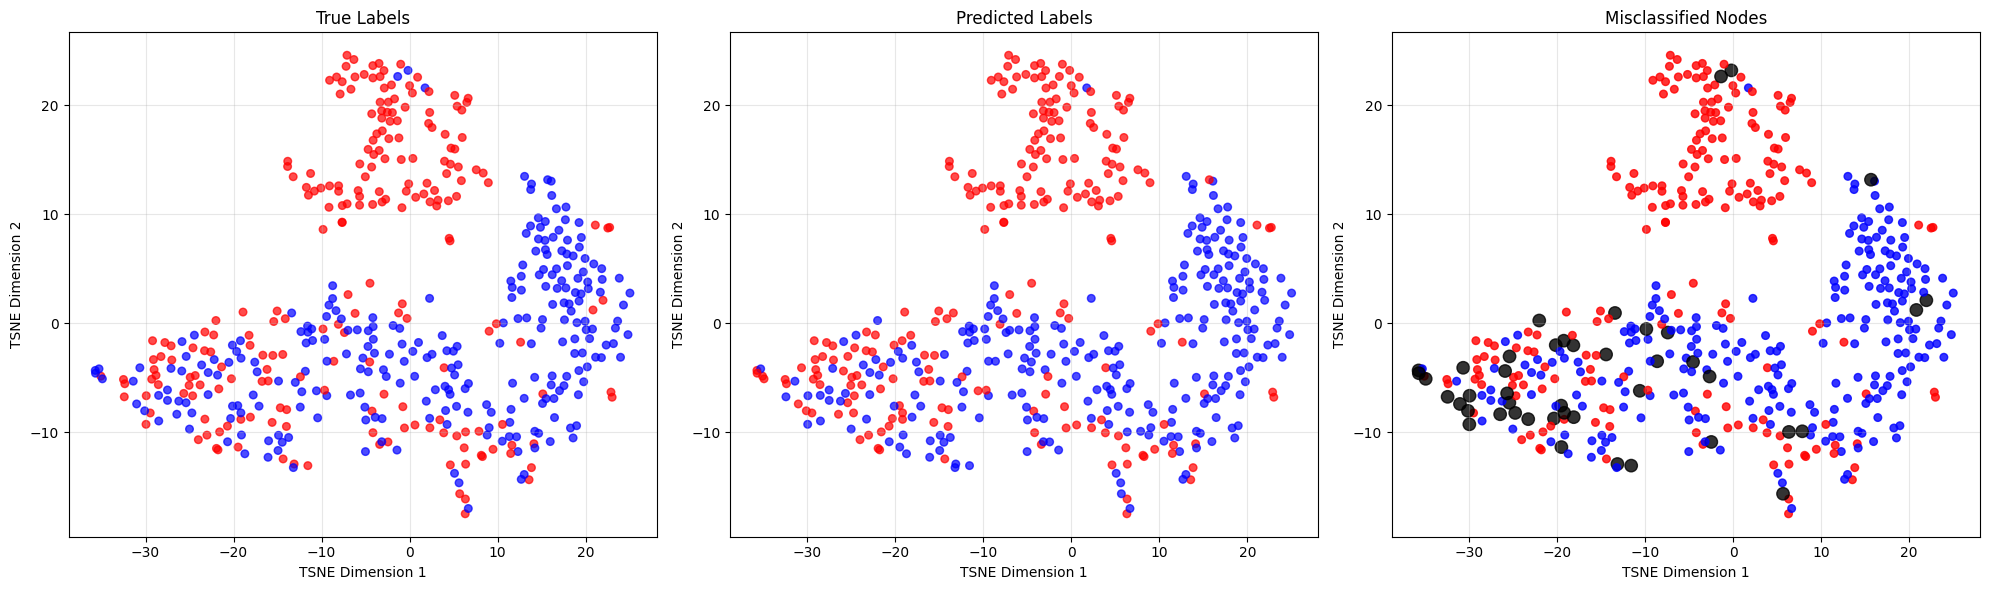

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# node embeddings and predictions
best_model.eval()
with torch.no_grad():
    embeddings = best_model.gat1(data.x, data.edge_index)
    out = best_model(data.x, data.edge_index)
    pred = out.argmax(dim = 1)

embeddings = embeddings.cpu().numpy()
pred = pred.cpu().numpy()
true = data.y.cpu().numpy()

# tsne
tsne = TSNE(n_components = 2, random_state = 42)
embeddings_2d = tsne.fit_transform(embeddings)

color_map = {0: 'blue', 1: 'red'}
true_colors = [color_map[label] for label in true]
pred_colors = [color_map[label] for label in pred]

# misclassified nodes
misclassified = (pred != true)
misclassified_sizes = [80 if wrong else 30 for wrong in misclassified]
misclassified_colors = ['black' if wrong else color_map[label] for wrong, label in zip(misclassified, true)]

# Plot
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = true_colors, s = 30, alpha = 0.7)
axs[0].set_title("True Labels")
axs[0].grid(True, alpha = 0.3)

axs[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = pred_colors, s = 30, alpha = 0.7)
axs[1].set_title("Predicted Labels")
axs[1].grid(True, alpha = 0.3)

axs[2].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c = misclassified_colors, s = misclassified_sizes, alpha = 0.8)
axs[2].set_title("Misclassified Nodes")
axs[2].grid(True, alpha = 0.3)

for ax in axs:
    ax.set_xlabel("TSNE Dimension 1")
    ax.set_ylabel("TSNE Dimension 2")

plt.tight_layout()
plt.show()